In [1]:
# An experimental drug was tested on individuals from ages 13 to 65. T
# he trial had 2100 participants.Half were under 65 years old,
# half were over 65 years old. 95% of patients 65 or older experienced side effects. 
# 95% of patients under 65 experienced no side effects.



In [2]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [3]:
train_samples=[]
train_labels=[]

In [4]:
#Generating samples and labels using randint funtion
#We append 1 if older and 0 if younger

for i in range(50):
   #5% of younger individuals who did not  experience side effects
	random_older=randint(65,100)
	train_samples.append(random_older)
	train_labels.append(0)
 
  	#5% of older individuals who did  experience side effects
	random_younger=randint(13,64)
	train_samples.append(random_younger)
	train_labels.append(1)
 

 


In [5]:
 
for i in range(1000):
	#95% of younger individuals who did not experience side effects
	random_younger=randint(13,64)
	train_samples.append(random_younger)
	train_labels.append(0)

	#95% of older indivisuals who did experience side effects
	random_older=randint(65,100)
	train_samples.append(random_older)
	train_labels.append(1)	
 

In [6]:
print(train_samples[:5])

[76, 30, 100, 27, 77]


In [7]:

# If you print train_samples and train_labels as it is it will display results in a list,since they are declared as a list
# Hence we use a for loop to display individual samples or labels

# for i in train_labels:
# 	print(i)


print(len(train_samples), train_samples[:5])
print(len(train_labels), train_labels[:5])

2100 [76, 30, 100, 27, 77]
2100 [0, 1, 0, 1, 0]


In [8]:
# keras requiers samples and labels to be in a numpy array or a list of numpy array

train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
# train_labels,train_samples = shuffle(train_labels, train_samples)


In [9]:
#however the net won't be able to learn from this training data the way it is(13,100)
#Hence we make use of scikit-learn' MinMaxScaler which will scale down from (13,100)  to the rang especified(0,1)

scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform((train_samples).reshape(-1,1)) #reshape function is a technical formality,of working with a 1d array



In [10]:
# for i in scaled_train_samples:
# 	print(i)
scaled_train_samples[:5]

array([[0.72413793],
       [0.1954023 ],
       [1.        ],
       [0.16091954],
       [0.73563218]])

In [11]:
#keras Sequential class is a linear stack of array.
#model accepts an array.
#each of which is the layer
#model=Sequential([l1,l2..]),this is how you pass the layers in the constructor
#or model.add(l1,l2..)
#similarly the activation funtion can be passed as a parameter or another layer as model.add(activation='relu')

#Only the first layer ie the 1st dense layer reqiires the input_shape
model=Sequential([
	Dense(16,input_shape=(1,),activation='relu'), 
	Dense(32,activation='relu'),
	Dense(2,activation='softmax')
	])
print (model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#Adam is an optimizer funtion,metrics to check the performance of the model
model.compile(Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:

#Training
#Epochs: No of traning runs; shuffle:every time model goes through data, it shuffles 
#the data or order in which it runs through the data,by default it remains True for the 
#fit function.
#verbose:
model.fit(scaled_train_samples,train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose =2)

Epoch 1/30
189/189 - 1s - loss: 0.6479 - accuracy: 0.5418 - val_loss: 0.6232 - val_accuracy: 0.5952
Epoch 2/30
189/189 - 0s - loss: 0.6189 - accuracy: 0.6249 - val_loss: 0.5882 - val_accuracy: 0.7000
Epoch 3/30
189/189 - 0s - loss: 0.5895 - accuracy: 0.6989 - val_loss: 0.5541 - val_accuracy: 0.7667
Epoch 4/30
189/189 - 0s - loss: 0.5600 - accuracy: 0.7550 - val_loss: 0.5187 - val_accuracy: 0.8000
Epoch 5/30
189/189 - 0s - loss: 0.5303 - accuracy: 0.7899 - val_loss: 0.4830 - val_accuracy: 0.8429
Epoch 6/30
189/189 - 0s - loss: 0.5001 - accuracy: 0.8159 - val_loss: 0.4476 - val_accuracy: 0.8857
Epoch 7/30
189/189 - 0s - loss: 0.4703 - accuracy: 0.8376 - val_loss: 0.4124 - val_accuracy: 0.9048
Epoch 8/30
189/189 - 0s - loss: 0.4420 - accuracy: 0.8582 - val_loss: 0.3785 - val_accuracy: 0.9095
Epoch 9/30
189/189 - 0s - loss: 0.4159 - accuracy: 0.8741 - val_loss: 0.3473 - val_accuracy: 0.9238
Epoch 10/30
189/189 - 0s - loss: 0.3931 - accuracy: 0.8915 - val_loss: 0.3189 - val_accuracy: 0.9238

In [14]:
#Validation to avoid overfitting
#struct is an array that contains a tuple of a sample and the label
#valid_set=[(sample,label),(sample,label),...,(sample,label)]
#include this is above model.fit using validaion_data
# or validation_split=0-1
#If validation_split is mentioned then shuffle becomes false hence in every epoch the validation data remains the same i.e last 10% in every run and does not shuffle
test_samples=[]
test_labels=[]

In [15]:





#Validation to avoid overfitting
#struct is an array that contains a tuple of a sample and the label
#valid_set=[(sample,label),(sample,label),...,(sample,label)]
#include this is above model.fit using validaion_data
# or validation_split=0-1
#If validation_split is mentioned then shuffle becomes false hence in every epoch the validation data remains the same i.e last 10% in every run and does not shuffle
test_samples=[]
test_labels=[]

for i in range(10):
	random_younger=randint(13,64)
	test_samples.append(random_younger)
	test_labels.append(1)

	random_older=randint(65,100)
	test_samples.append(random_older)
	test_labels.append(0)

for i in range(200):
	random_younger=randint(13,64)
	test_samples.append(random_younger)
	test_labels.append(0)

	random_older=randint(65,100)
	test_samples.append(random_older)
	test_labels.append(1)
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)

# scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scaler.fit_transform((test_samples).reshape(-1,1))


In [16]:
# predictions

predictions=model.predict(scaled_test_samples,batch_size=10,verbose=0)
for i in predictions:
	print (i)




[0.9236779  0.07632217]
[0.05832017 0.9416798 ]
[0.96249723 0.03750277]
[0.29475912 0.70524085]
[0.9381424 0.0618576]
[0.0863657 0.9136343]
[0.85873854 0.14126149]
[0.02589495 0.97410506]
[0.9630044  0.03699563]
[0.02969844 0.9703015 ]
[0.9319433  0.06805674]
[0.03404108 0.9659589 ]
[0.96139336 0.03860667]
[0.3894416 0.6105584]
[0.8209854  0.17901462]
[0.02589495 0.97410506]
[0.96054506 0.03945497]
[0.21499059 0.7850094 ]
[0.6310419  0.36895812]
[0.19216421 0.80783576]
[0.9640273  0.03597273]
[0.06656092 0.9334391 ]
[0.94305    0.05694997]
[0.09209153 0.9079085 ]
[0.87498343 0.12501658]
[0.05456789 0.94543207]
[0.799333 0.200667]
[0.05832017 0.9416798 ]
[0.9471318  0.05286821]
[0.35650495 0.6434951 ]
[0.96195054 0.03804949]
[0.04463244 0.95536757]
[0.964266   0.03573399]
[0.10692261 0.8930774 ]
[0.96414685 0.03585317]
[0.0863657 0.9136343]
[0.6632019 0.336798 ]
[0.1521519 0.8478482]
[0.9637955  0.03620455]
[0.3894416 0.6105584]
[0.56337607 0.4366239 ]
[0.35650495 0.6434951 ]
[0.9533353

In [17]:
rounded_predictions=model.predict_classes(scaled_test_samples,batch_size=10,verbose=0)
for i in rounded_predictions:
	print (i)


0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


/Users/vivekkannajayaprakash/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
#Confusion matrix

cm=confusion_matrix(test_labels,rounded_predictions)

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
	plt.imshow(cm,interpolation='nearest',cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks=np.arange(len(classes))
	plt.xticks(tick_marks,classes,rotation=45)
	plt.yticks(tick_marks,classes)

	if normalize:
		cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
		print("Normalized confusion matrix")
	else:
		print('Confusion Matrix,without normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
		plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')


In [19]:
cm_plot_labels=['no_side_effects','had_side_effects']

Confusion Matrix,without normalization
[[195  15]
 [ 10 200]]


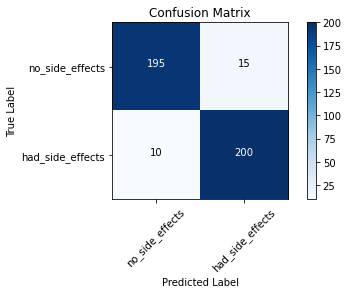

In [20]:

plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')
plt.show()



In [21]:
model.save('medical_trial_model.h5')